### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://corners.gmarket.co.kr/bestsellers'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

#### 3. bs > DataFrame

In [5]:
dom = BeautifulSoup(response.text, 'html.parser')

In [11]:
elements = dom.select('#gBestWrap > div > div:nth-child(5) > div > ul > li')
len(elements)
#gBestWrap > div > div:nth-child(5) > div > ul > li

200

In [12]:
element = elements[0]

In [17]:
data={
    'title' : element.select_one('.itemname').text,
    'link' : element.select_one('.itemname').get('href'),
    'img' : 'http:' + element.select_one('img').get('data-original'),
    'o-price' : element.select_one('.o-price').text,
    's_price' : element.select_one('.s-price').text.strip().split('\n')[0],
}
data

{'title': '[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2628342593&ver=638122426587993579',
 'img': 'http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714',
 'o-price': '정가33,800원',
 's_price': '할인가23,700원'}

In [15]:
element

<li class="first" id="itemidx1">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426587993579" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');"><img alt="[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음" class="lazy" data-original="//gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/allmaeil"><span class="view">판매자 다른상품 보기</span>매일유업공식판매업체</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426587993579" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');">[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음</a>
<div class="item_price">
<div class="o-price"><span class=

In [20]:
data=[]
for element in elements:
    data.append({
        'title' : element.select_one('.itemname').text,
        'link' : element.select_one('.itemname').get('href'),
        'img' : 'http:' + element.select_one('img').get('data-original'),
        'o-price' : element.select_one('.o-price').text,
        's_price' : element.select_one('.s-price').text.strip().split('\n')[0],
    })
df =pd.DataFrame(data)
df.tail(2)

,title,link,img,o-price,s_price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"정가43,000원","할인가12,900원"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"정가96,000원","할인가80,000원"


In [27]:
df[20:40]

#update : 데이터선택 = 수정할 데이터
idx=df[df['o-price'] == ''].index
#df['s_price'].loc[idx]
df['o-price'].loc[idx] = df['s_price'].loc[idx]

In [28]:
df[20:40]

,title,link,img,o-price,s_price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,"할인가199,000원","할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,"할인가7,900원","할인가7,900원"
22,[일동후디스]후디스 아이음료 과자 모음전,http://item.gmarket.co.kr/Item?goodscode=22631...,http://gdimg.gmarket.co.kr/2263121320/still/30...,"정가25,100원","할인가17,600원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,"할인가11,800원","할인가11,800원"
24,[구글플레이]기프트코드 5만원 / 구글 기프트카드,http://item.gmarket.co.kr/Item?goodscode=16552...,http://gdimg.gmarket.co.kr/1655242060/still/30...,"정가50,000원","할인가47,500원"
25,[닥터지]닥터지 블랙 스네일 달팽이크림 50ml 1+1_A005956,http://item.gmarket.co.kr/Item?goodscode=27324...,http://gdimg.gmarket.co.kr/2732477762/still/30...,"정가26,300원","할인가24,200원"
26,[오뚜기]오뚜기 가벼운참치 라이트스탠다드 135GX12개,http://item.gmarket.co.kr/Item?goodscode=25534...,http://gdimg.gmarket.co.kr/2553487898/still/30...,"정가29,900원","할인가27,900원"
27,아침이슬사과 22년 햇 부사 가정용 중대과 4.5kg(22과내),http://item.gmarket.co.kr/Item?goodscode=26129...,http://gdimg.gmarket.co.kr/2612939665/still/30...,"정가15,470원","할인가10,900원"
28,쌈빡김치 국내산 100% 전라도 파김치 1kg,http://item.gmarket.co.kr/Item?goodscode=27851...,http://gdimg.gmarket.co.kr/2785125457/still/30...,"정가15,000원","할인가10,000원"
29,[풀무원]로스팅짜장 라면 4봉(파기름2봉+고추기름2봉),http://item.gmarket.co.kr/Item?goodscode=23756...,http://gdimg.gmarket.co.kr/2375673537/still/30...,"정가10,000원","할인가9,400원"


In [37]:
#regex정규표현식
#문자열 데이터를 특정 패턴으로 처리할때 사용하는 문법
import re
price = '할인가1,111,800원'
re.findall('[0-9,]+',price) #0~9까지 숫자와 ,가 1개 이상있는걸 선택

['1,111,800']

In [38]:
df['o-price'] = df['o-price'].apply(lambda price: re.findall('[0-9,]+', price)[0]) 
df['s_price'] = df['s_price'].apply(lambda price: re.findall('[0-9,]+', price)[0]) 
df.tail(2)

,title,link,img,o-price,s_price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"43,000","12,900"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"96,000","80,000"


In [42]:
#가독성도 떨어지고 상황이 아니라면 안쓰는걸 추천
txt='저의 이메일 주소는 jmu1462@naver.com과 jmw1462@naver.com입니다.'
re.findall('[a-zA-Z0-9.]+@[a-z]+\.[a-z]+',txt)

['jmu1462@naver.com', 'jmw1462@naver.com']

#### 4. download image

In [43]:
#이미지 파일 저장할 디렉토리

,title,link,img,o-price,s_price
0,[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음,http://item.gmarket.co.kr/Item?goodscode=26283...,http://gdimg.gmarket.co.kr/2628342593/still/30...,"33,800","23,700"
1,[피셔프라이스]피셔프라이스 러닝 푸드트럭,http://item.gmarket.co.kr/Item?goodscode=19985...,http://gdimg.gmarket.co.kr/1998535842/still/30...,"210,000","99,000"
2,[나이키키즈](대구신세계)[나이키키즈] (105~170) 조던 썸머 상/하의세트 세일가,http://item.gmarket.co.kr/Item?goodscode=27728...,http://gdimg.gmarket.co.kr/2772877848/still/30...,"58,000","45,820"
3,(지오지아)사계절 테이퍼드/와이드핏 슬랙스 치노팬츠 10종 택1,http://item.gmarket.co.kr/Item?goodscode=27678...,http://gdimg.gmarket.co.kr/2767818438/still/30...,"32,000","24,640"
4,[플랙]남성 데님 팬츠 6종 택1(PJTT5MLD731외5종),http://item.gmarket.co.kr/Item?goodscode=27808...,http://gdimg.gmarket.co.kr/2780877061/still/30...,"69,000","50,370"
...,...,...,...,...,...
195,(깨비농원) 한라봉 4kg 가정용(크기랜덤),http://item.gmarket.co.kr/Item?goodscode=27748...,http://gdimg.gmarket.co.kr/2774808274/still/30...,"25,870","18,900"
196,[압타밀]압타밀 프로푸트라 1단계 800g 4통 세트 독일내수용 / 빠른배송 / 최신제품,http://item.gmarket.co.kr/Item?goodscode=27748...,http://gdimg.gmarket.co.kr/2774807080/still/30...,"149,800","143,060"
197,2세대 코코맘 이동식트롤리 기저귀정리함 3단 캡형,http://item.gmarket.co.kr/Item?goodscode=27623...,http://gdimg.gmarket.co.kr/2762398385/still/30...,"51,900","44,900"
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"43,000","12,900"


In [46]:
import os
dir_name='data'
if not os.path.exists(dir_name):
    os.makedirs('data')

In [47]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EE2D-1664

 C:\Users\User\학생용\학생용\20230207\mini_project 디렉터리

2023-02-13  오전 10:24           147,929 (Solution) 1.1 데이터 불러오기 및 분석(EDA)_1차_버스정류장데이터.ipynb
2023-02-13  오전 10:24            80,713 (Solution) 1.2 데이터 불러오기 및 분석(EDA)_1차_유동인구데이터.ipynb
2023-02-17  오후 03:47    <DIR>          .
2023-02-17  오후 03:47    <DIR>          ..
2023-02-17  오후 02:51    <DIR>          .ipynb_checkpoints
2023-02-13  오전 10:24            96,768 [참고자료]조별 토론 방법론 토론기법 MURAL 양식.pptx
2023-02-17  오후 01:46            10,595 01_html.ipynb
2023-02-17  오후 02:14            12,795 02_css_selector.ipynb
2023-02-17  오후 02:41             9,886 03_naver_relational_keywords.ipynb
2023-02-17  오후 03:47            39,320 04_gmarket.ipynb
2023-02-17  오후 01:46             2,427 05_selenium.ipynb
2023-02-13  오전 10:24           328,354 1.1 bus_station.csv
2023-02-13  오전 10:25       112,244,370 1.1 BUS_STATION_BOARDING_MONTH_202204.csv
2023-02-13  오전 10:28            19,367 1.1 데이터 불러오기 및 분석(EDA)_1차_버

In [48]:
img_link = df.loc[0, 'img']
print(img_link)

http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714


In [49]:
response = requests.get(img_link)
response

<Response [200]>

In [52]:
with open('data/test.png', 'wb') as file:
    file.write(response.content)

In [53]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EE2D-1664

 C:\Users\User\학생용\학생용\20230207\mini_project\data 디렉터리

2023-02-17  오후 03:52    <DIR>          .
2023-02-17  오후 03:52    <DIR>          ..
2023-02-17  오후 03:52            33,866 test.png
               1개 파일              33,866 바이트
               2개 디렉터리  135,601,463,296 바이트 남음


In [54]:
#pillow : 파이썬에서 이미지 전처리를 하는 패키지
from PIL import Image as pil

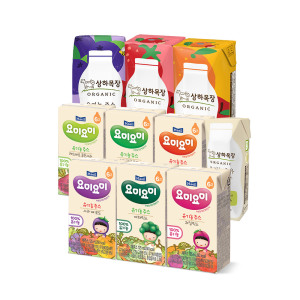

In [55]:
pil.open('data/test.png')

In [56]:
df

,title,link,img,o-price,s_price
0,[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음,http://item.gmarket.co.kr/Item?goodscode=26283...,http://gdimg.gmarket.co.kr/2628342593/still/30...,"33,800","23,700"
1,[피셔프라이스]피셔프라이스 러닝 푸드트럭,http://item.gmarket.co.kr/Item?goodscode=19985...,http://gdimg.gmarket.co.kr/1998535842/still/30...,"210,000","99,000"
2,[나이키키즈](대구신세계)[나이키키즈] (105~170) 조던 썸머 상/하의세트 세일가,http://item.gmarket.co.kr/Item?goodscode=27728...,http://gdimg.gmarket.co.kr/2772877848/still/30...,"58,000","45,820"
3,(지오지아)사계절 테이퍼드/와이드핏 슬랙스 치노팬츠 10종 택1,http://item.gmarket.co.kr/Item?goodscode=27678...,http://gdimg.gmarket.co.kr/2767818438/still/30...,"32,000","24,640"
4,[플랙]남성 데님 팬츠 6종 택1(PJTT5MLD731외5종),http://item.gmarket.co.kr/Item?goodscode=27808...,http://gdimg.gmarket.co.kr/2780877061/still/30...,"69,000","50,370"
...,...,...,...,...,...
195,(깨비농원) 한라봉 4kg 가정용(크기랜덤),http://item.gmarket.co.kr/Item?goodscode=27748...,http://gdimg.gmarket.co.kr/2774808274/still/30...,"25,870","18,900"
196,[압타밀]압타밀 프로푸트라 1단계 800g 4통 세트 독일내수용 / 빠른배송 / 최신제품,http://item.gmarket.co.kr/Item?goodscode=27748...,http://gdimg.gmarket.co.kr/2774807080/still/30...,"149,800","143,060"
197,2세대 코코맘 이동식트롤리 기저귀정리함 3단 캡형,http://item.gmarket.co.kr/Item?goodscode=27623...,http://gdimg.gmarket.co.kr/2762398385/still/30...,"51,900","44,900"
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"43,000","12,900"


In [65]:
for idx, data in df[:20].iterrows():
    filename = '0'*(2- len(str(idx))) +str(idx)
    filename = f'data/{filename}.png'
    print(idx, data['img'],filename)
    response = requests.get(data['img'])
    with open(filename, 'wb') as file:
        file.write(response.content)

0 http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714 data/00.png
1 http://gdimg.gmarket.co.kr/1998535842/still/300?ver=2023021714 data/01.png
2 http://gdimg.gmarket.co.kr/2772877848/still/300?ver=2023021714 data/02.png
3 http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021714 data/03.png
4 http://gdimg.gmarket.co.kr/2780877061/still/300?ver=2023021714 data/04.png
5 http://gdimg.gmarket.co.kr/2762345389/still/300?ver=2023021714 data/05.png
6 http://gdimg.gmarket.co.kr/182821824/still/300?ver=2023021714 data/06.png
7 http://gdimg.gmarket.co.kr/1977052165/still/300?ver=2023021714 data/07.png
8 http://gdimg.gmarket.co.kr/2635078880/still/300?ver=2023021714 data/08.png
9 http://gdimg.gmarket.co.kr/2347262038/still/300?ver=2023021714 data/09.png
10 http://gdimg.gmarket.co.kr/2090522905/still/300?ver=2023021714 data/10.png
11 http://gdimg.gmarket.co.kr/2779014323/still/300?ver=2023021714 data/11.png
12 http://gdimg.gmarket.co.kr/2246382810/still/300?ver=2023021714 data/12.p

In [63]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EE2D-1664

 C:\Users\User\학생용\학생용\20230207\mini_project\data 디렉터리

2023-02-17  오후 04:00    <DIR>          .
2023-02-17  오후 04:00    <DIR>          ..
2023-02-17  오후 04:00            33,866 0.png
2023-02-17  오후 04:00            20,310 1.png
2023-02-17  오후 04:00            24,620 10.png
2023-02-17  오후 04:00             5,751 11.png
2023-02-17  오후 04:00            21,315 12.png
2023-02-17  오후 04:00             6,248 13.png
2023-02-17  오후 04:00            46,155 14.png
2023-02-17  오후 04:00            63,785 15.png
2023-02-17  오후 04:00            50,126 16.png
2023-02-17  오후 04:00            16,533 17.png
2023-02-17  오후 04:00            32,257 18.png
2023-02-17  오후 04:00            22,492 19.png
2023-02-17  오후 04:00            10,109 2.png
2023-02-17  오후 04:00            29,089 3.png
2023-02-17  오후 04:00             5,481 4.png
2023-02-17  오후 04:00             6,896 5.png
2023-02-17  오후 04:00            26,815 6.png
2023-02-17  오후 04:00            23,003 7

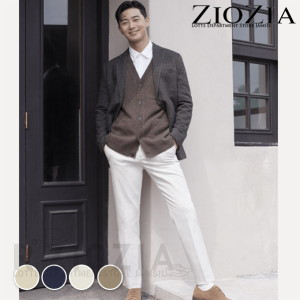

In [61]:
pil.open('data/3.png')